## using clustering for semi supervised learning

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#when we have plenty of unlabeled  instances and very few labeled instances

In [2]:
from sklearn.datasets import load_digits
x_digits,y_digits = load_digits(return_X_y = True)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_digits,y_digits)

In [11]:
#lets train a logistic regression model on a sample of 50 labeled
from sklearn.linear_model import LogisticRegression
n_labeled = 50
l= LogisticRegression()
l.fit(x_train[:n_labeled],y_train[:n_labeled])
l.score(x_test,y_test)


c:\users\1042g\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8444444444444444

In [12]:
x_train.shape

(1347, 64)

In [18]:
from sklearn.cluster import KMeans
k = 50 
kmeans = KMeans(n_clusters = k)
x_dist = kmeans.fit_transform(x_train)
r_d_i = np.argmin(x_dist,axis = 0)
x_rep = x_train[r_d_i]



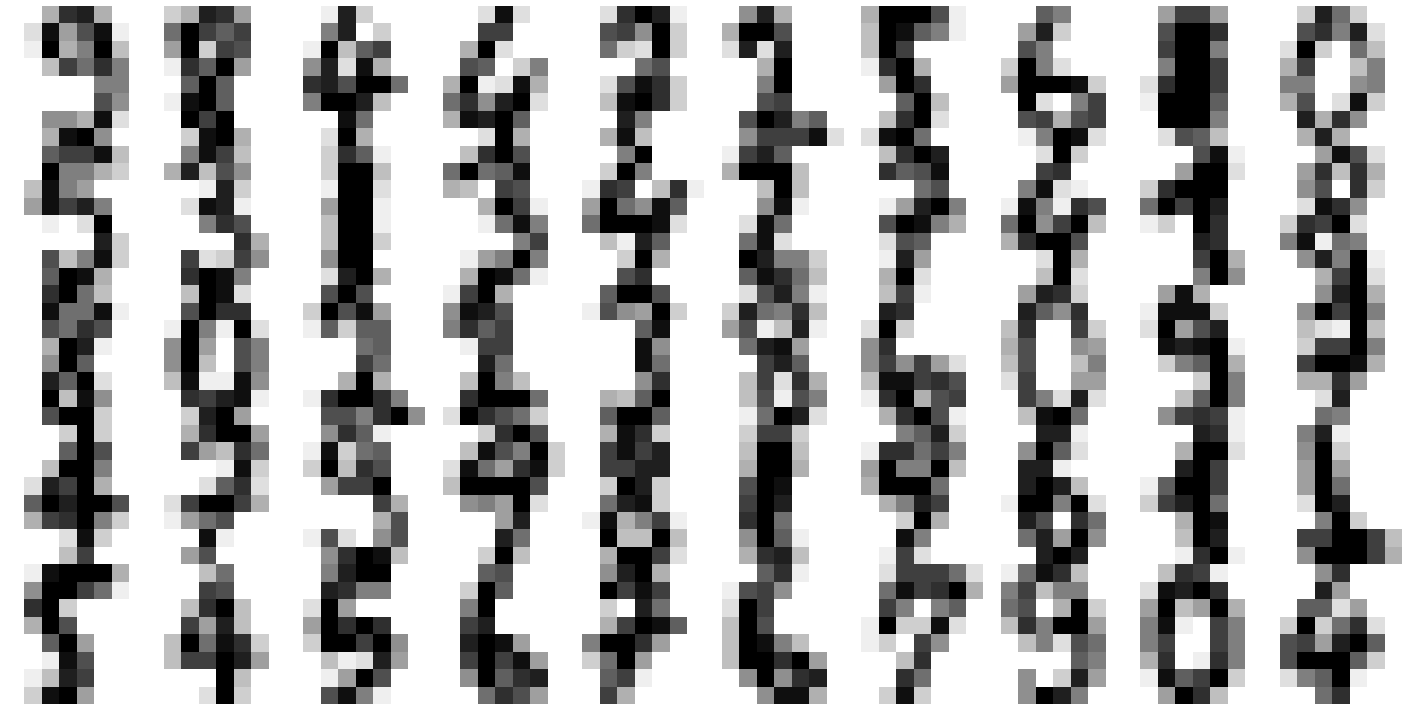

In [34]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 8
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = "binary", **options)
    plt.axis("off")

plt.figure(figsize=(25,25))
example_images = x_rep
plot_digits(example_images, images_per_row=10)
#save_fig("more_digits_plot")
plt.show()

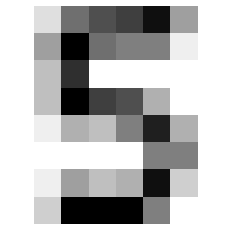

In [29]:
plt.imshow(x_train[0].reshape((8,8)),cmap = "binary")
plt.axis("off")
plt.show()

In [ ]:
y_r = np.array([9,8,4,4,2,1,5,6,1,0])

In [ ]:
l= LogisticRegression()
l.fit(x_train[r_d_i],y_r)
l.score(x_test,y_test)
